In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [ ]:
df = pd.read_csv('/content/eeg-eye-state.csv')
df.head()

,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
X = df.drop("class", axis=1)
y = df["class"]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
X_cnn = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

print(X_cnn.shape)


(14980, 14, 1)


In [ ]:
model = Sequential()

# Convolution Layer
model.add(Conv1D(filters=32, kernel_size=3, activation="relu",
                 input_shape=(14, 1)))

# Pooling Layer
model.add(MaxPooling1D(pool_size=2))

# Regularization
model.add(Dropout(0.3))

# Flatten
model.add(Flatten())

# Dense Layer
model.add(Dense(32, activation="relu"))

# Output Layer
model.add(Dense(1, activation="sigmoid"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6414 - loss: 0.6210 - val_accuracy: 0.6500 - val_loss: 0.6081
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6517 - loss: 0.6128 - val_accuracy: 0.6604 - val_loss: 0.6056
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6493 - loss: 0.6103 - val_accuracy: 0.6571 - val_loss: 0.6000
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6522 - loss: 0.6059 - val_accuracy: 0.6733 - val_loss: 0.5928
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6693 - loss: 0.5962 - val_accuracy: 0.6742 - val_loss: 0.5855
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6696 - loss: 0.5961 - val_accuracy: 0.6854 - val_loss: 0.5787
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6703 - loss: 0.5900 - val_accuracy: 0.6875 - val_loss: 0.5739
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6744 - loss: 0.5884 - val_accuracy: 0.

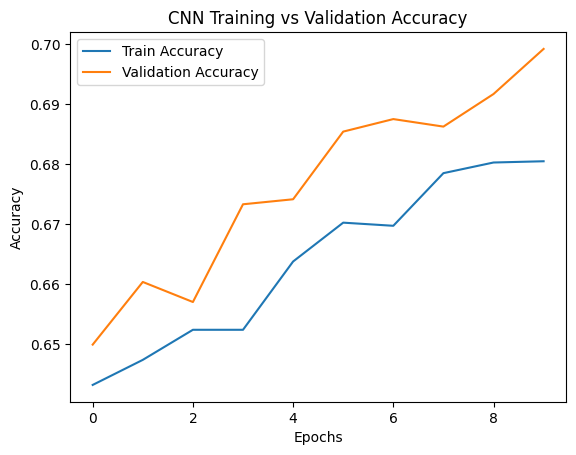

In [ ]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("CNN Training vs Validation Accuracy")
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("CNN Test Accuracy:", test_accuracy)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7162 - loss: 0.5535
CNN Test Accuracy: 0.7072763442993164


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


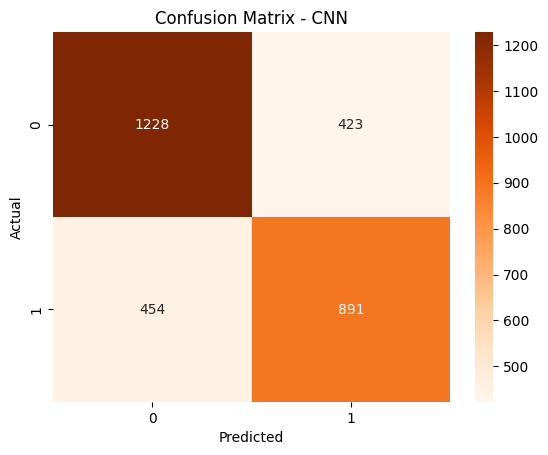

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1651
           1       0.68      0.66      0.67      1345

    accuracy                           0.71      2996
   macro avg       0.70      0.70      0.70      2996
weighted avg       0.71      0.71      0.71      2996



In [ ]:
model.save("cnn_eye_model.h5")
